# Bayesian A/B Testing

In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
true_rate_control = 0.69

true_rate_experiment = 0.7

people_visting_site = 500

# Create a numpy array with a shape of 2 by number of people visiting the site
# the first row represents the control outcomes and the second row is the experimental outcomes

control, experiment = np.random.rand(2, people_visting_site)

#if the random number is above than the true rate it is counted as a success, else failure 
control_successes = sum(control < true_rate_control)
experiment_successes = sum(experiment < true_rate_experiment)

control_failures = people_visting_site - control_successes
experiment_failures = people_visting_site - experiment_successes

Successes: 1
Failures: 1


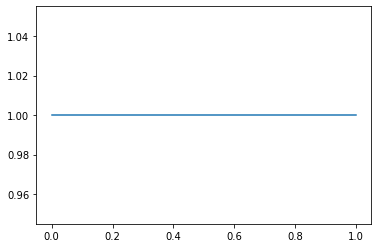

In [3]:
# Our Priors
prior_successes = 1
prior_failures = 1
prior_distribution = beta(prior_successes, prior_failures)

#graph of prior distribution
fig, ax = plt.subplots()

x_ = np.linspace(0, 1, 1000)
ax.plot(x_, prior_distribution.pdf(x_))

print(f'Successes: {prior_successes}')
print(f'Failures: {prior_failures}')

control_successes: 351
control_failures: 149
--------------------------
experiment_successes: 364
experiment_failures: 136


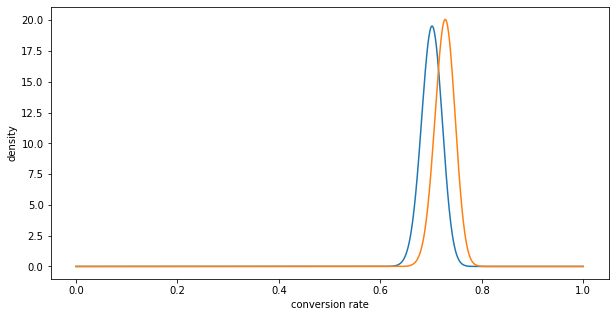

In [4]:
# For our graph
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 

# Control
control_alpha = control_successes + prior_successes
control_beta = control_failures + prior_failures

# Experiment
experiment_alpha = experiment_successes + prior_successes
experiment_beta = experiment_failures + prior_failures


# Generate beta distributions based on number of successes(alpha) and failures(beta)
control_distribution = beta(control_alpha, control_beta)
experiment_distribution = beta(experiment_alpha, experiment_beta)

#plot distributions using 

x = np.linspace(0, 1, 1000)
ax.plot(x, control_distribution.pdf(x))
ax.plot(x, experiment_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density');

print(f'control_successes: {control_successes}')
print(f'control_failures: {control_failures}')
print('--------------------------')
print(f'experiment_successes: {experiment_successes}')
print(f'experiment_failures: {experiment_failures}')

## Bayesian Error Bars

In [5]:
sample_size = people_visting_site*2
c_samples = pd.Series([control_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([experiment_distribution.rvs() for _ in range(sample_size)])

p_ish_value = 1.0 - sum(e_samples > c_samples)/sample_size
p_ish_value

0.18300000000000005

control_successes: 7295
control_failures: 3205
--------------------------
experiment_successes: 7323
experiment_failures: 3177


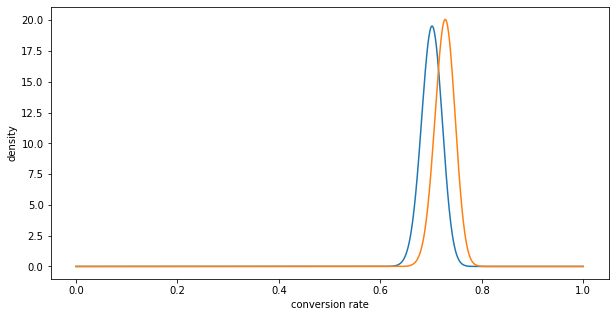

In [6]:
additional_visitors = 10000

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, additional_visitors)

# Add to existing data
control_successes += sum(control < true_rate_control)
experiment_successes += sum(experiment < true_rate_experiment)

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 

control_failures += additional_visitors - sum(control < true_rate_control)
experiment_failures += additional_visitors - sum(experiment < true_rate_experiment)

x = np.linspace(0, 1, 1000)
ax.plot(x, control_distribution.pdf(x))
ax.plot(x, experiment_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density');

print(f'control_successes: {control_successes}')
print(f'control_failures: {control_failures}')
print('--------------------------')
print(f'experiment_successes: {experiment_successes}')
print(f'experiment_failures: {experiment_failures}')